### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 25th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx$$

1) What does this integral analytically evaluate to? (Should involve $\sigma$.) Once you work this equation out, we will refer to this equality of the integral and analytic value as EQ1. 

2) Write down the standard form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

3) Manipulate EQ1 such that you can write the integral in terms of a function of $x$ weighted by a normalized half-Gaussian distribution. 

4) Draw $N=10^5$ samples from a $\sigma=2$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your new equation involving a half-Gaussian distribution from (3). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

5) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

6) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=150$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^5$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 150? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

Draws: [100.07201998  90.73296068 110.09177636 131.97222119  90.13800252
  81.79305495  87.76848556 109.78017634  72.20086     89.32870831], PDF(150): 0.0001
Fraction of people with IQ > 150:  0.0004
IQ of one in a million:  171.30 
 or:  28.70


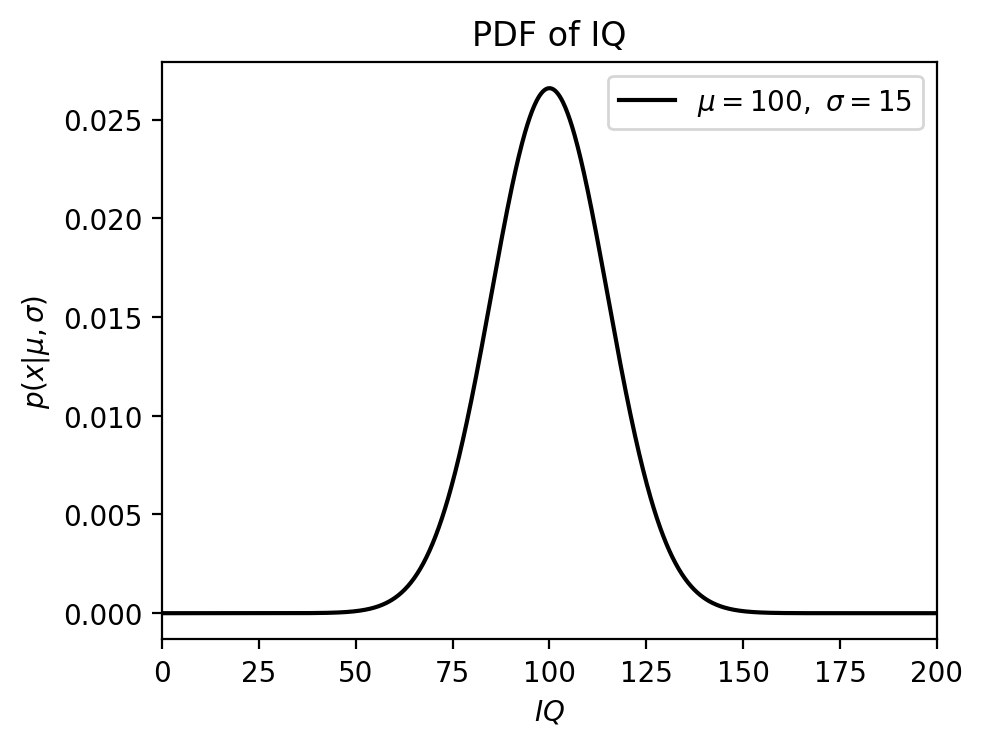

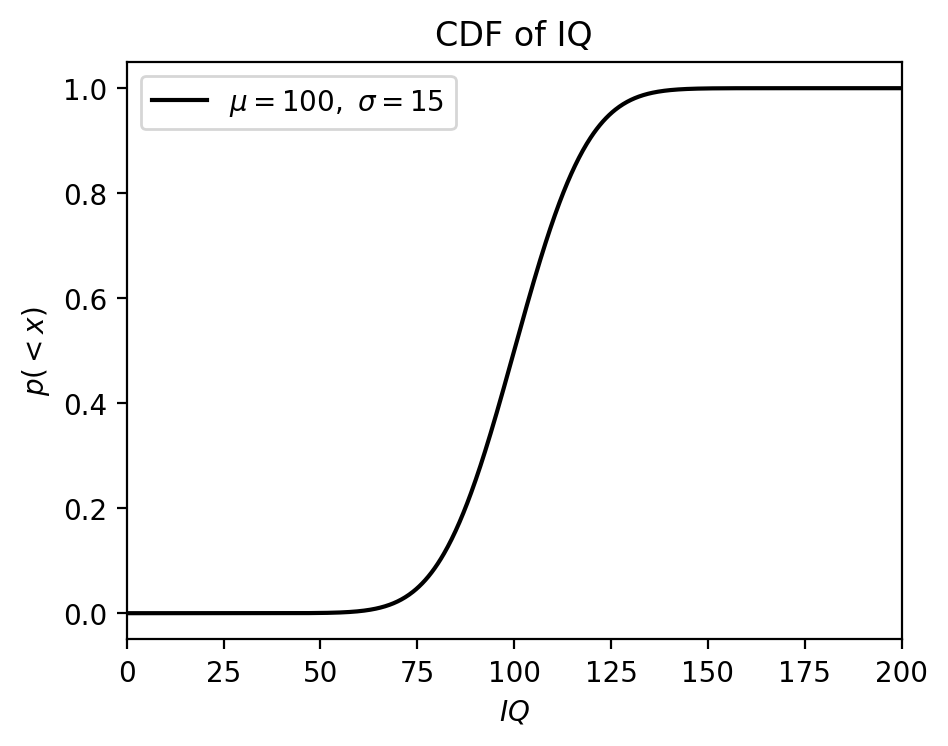

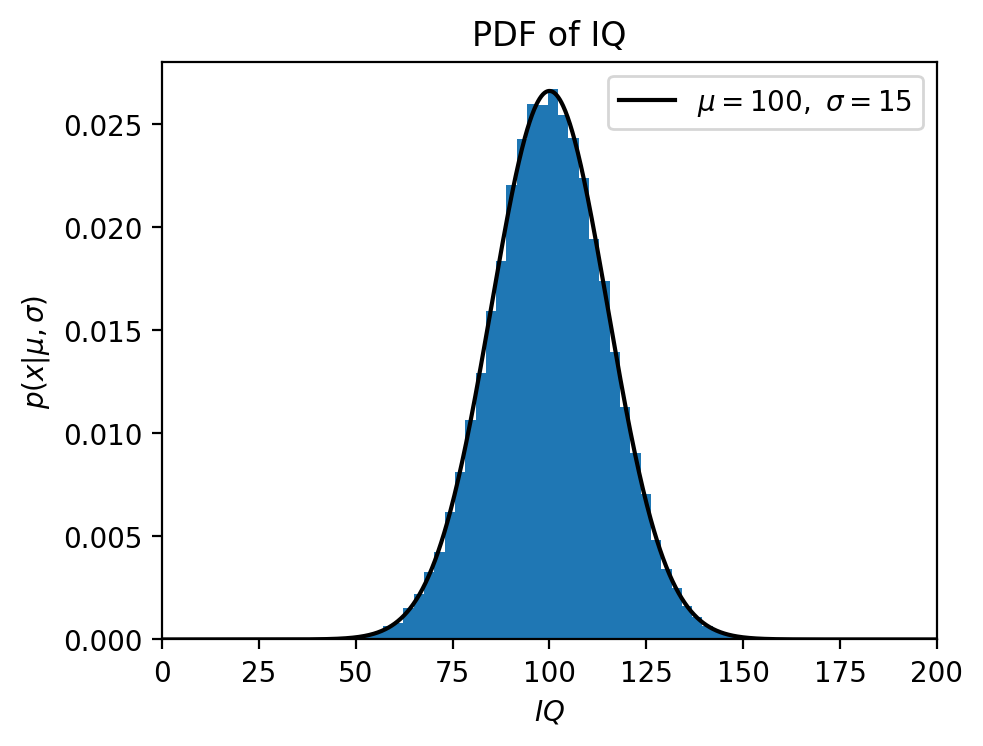

In [53]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats


xgrid = np.linspace(0, 200, 1000)
dist = norm(100, 15)
cdf = dist.cdf(xgrid)
draws = dist.rvs(10) # 10 random draws
p = dist.pdf(150)
gaussPDF = dist.pdf(xgrid)

fig, ax = plt.subplots(figsize=(5, 3.75))


plt.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 200)
#plt.ylim(0, 0.03)
plt.xlabel(r'$IQ$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('PDF of IQ')
plt.legend()

print(f'Draws: {draws}, PDF(150): {p:.4f}')



# Plotting the CDF of distribution
fig, ax = plt.subplots(figsize=(5, 3.75))

plt.plot(xgrid, cdf, ls='-', c='black', 
         label=r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 200)
#plt.ylim(0, 0.03)
plt.xlabel('$IQ$')
plt.ylabel(r'$p(< x)$')
plt.title('CDF of IQ')
plt.legend()


# Plotting the CDF of distribution
fig, ax = plt.subplots(figsize=(5, 3.75))

#plt.plot(xgrid, cdf, ls='-', c='black', 
    #     label=f'$\mu=100,\ \sigma=15$')
plt.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 200)
#plt.ylim(0, 0.03)
plt.xlabel('$IQ$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('PDF of IQ')
plt.legend()


y_sample = np.linspace(0.001, 0.9999, 10*5)
y_sample =  np.random.random(10**5)
ppf_vals = dist.ppf(y_sample)

_ = plt.hist(ppf_vals, bins = 50, density=True)


print("Fraction of people with IQ > 150: ", "%.4f"%(1-dist.cdf(150)))

print("IQ of one in a million: ", "%.2f"%dist.ppf(1-(1/10**6)), '\n or: ', "%.2f"%dist.ppf(1/(10**6)))


## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

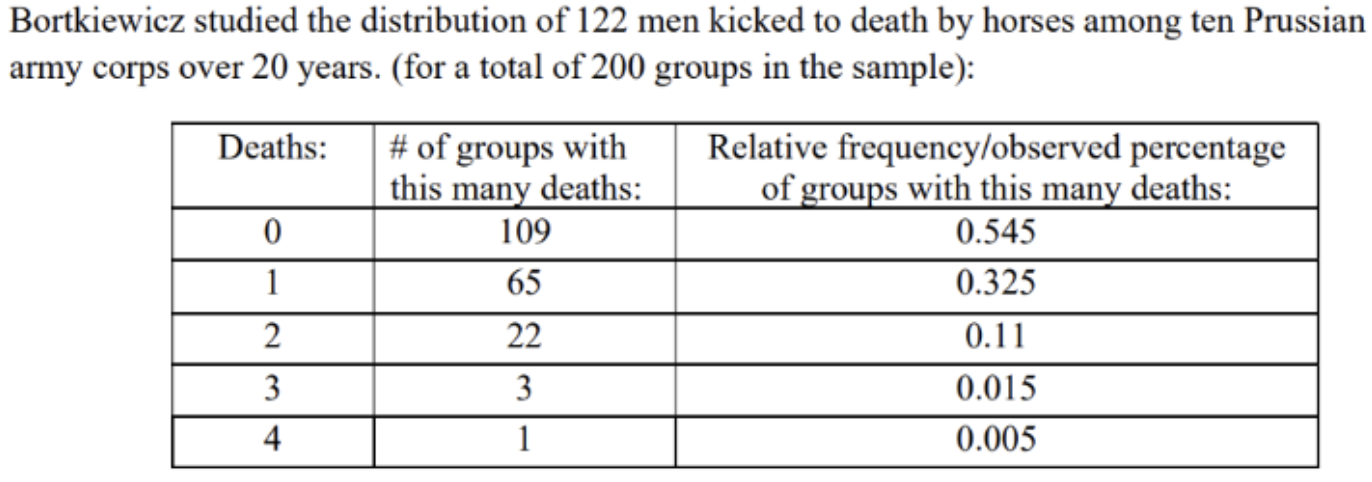

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting soon, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
/var/folders/ls/sw9901md6hg56d8jmwp77nyr0000gp/T/ipykernel_94141/3002863216.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(deaths, pdf, '-o',  color=c, label='$\mu=' + str(mu) + '$')
/var/folders/ls/sw9901md6hg56d8jmwp77nyr0000gp/T/ipykernel_94141/3002863216.py:30: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(deaths, poisson.pmf(deaths, mean), label=f'$\mu={mean:.2f}$')


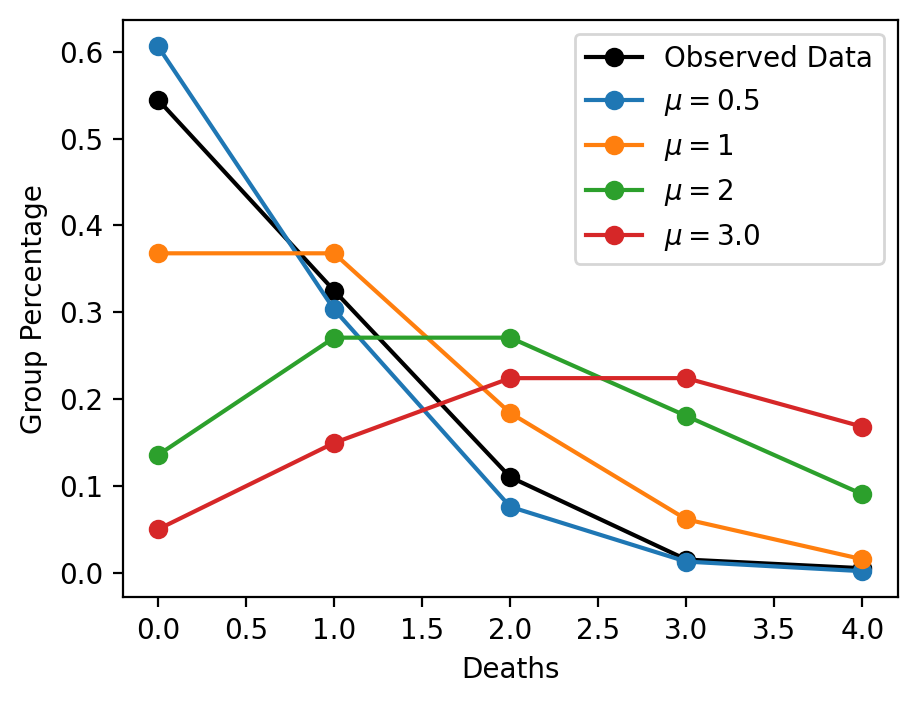

0.61


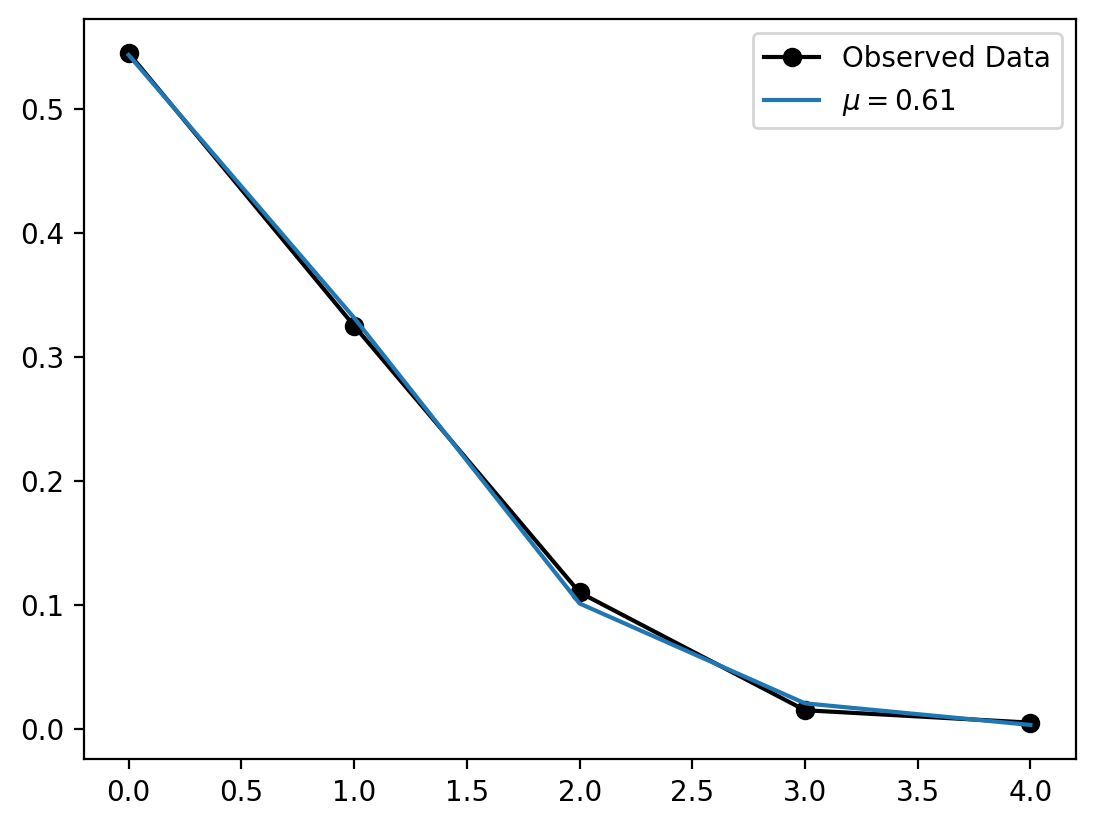

In [108]:
from scipy.stats import poisson
import seaborn as sns

deaths = np.array([0, 1, 2, 3, 4])
rel_perc = np.array([0.545, 0.325, 0.11, 0.015, 0.005])

fig, ax = plt.subplots(figsize=(5, 3.75))

plt.plot(deaths, rel_perc,'-o', c='black', label='Observed Data')
    

for mu, c in zip([0.5, 1,2,3.0], 
                 sns.color_palette()[:4]):
    # random draws
    pdf = poisson.pmf(deaths, mu)
    # histogram of random draws
    plt.plot(deaths, pdf, '-o',  color=c, label='$\mu=' + str(mu) + '$')
    
plt.xlabel('Deaths')
plt.ylabel(r'Group Percentage')
plt.title('')
plt.legend()
plt.show()

# Calculating the weighted mean
mean = np.sum(deaths * rel_perc)


plt.plot(deaths, rel_perc,'-o', c='black', label='Observed Data')
plt.plot(deaths, poisson.pmf(deaths, mean), label=f'$\mu={mean:.2f}$')
plt.legend()
print("%.2f"%mean)


